<a href="https://colab.research.google.com/github/jannaty26/Virtual-Magang/blob/main/Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
#import nltk as
#from keras.models import Sequential
#from keras.layers.core import Danse, Activation
#from keras.utlis import np_utlis'''

In [ ]:
from google.colab import files
upload = files.upload()


Saving previous_application.csv to previous_application.csv


In [ ]:
df = pd.read_csv('previous_application.csv')


In [ ]:
df.shape

(1670214, 37)

In [ ]:
df.head(3)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0


In [ ]:
#melihat karakteristik dari masing-masing data
df.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115833,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [ ]:
#melihat nilai yang hilang
df.isnull().sum().sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED       1664263
RATE_INTEREST_PRIMARY          1664263
AMT_DOWN_PAYMENT                895844
RATE_DOWN_PAYMENT               895844
NAME_TYPE_SUITE                 820405
NFLAG_INSURED_ON_APPROVAL       673065
DAYS_TERMINATION                673065
DAYS_LAST_DUE                   673065
DAYS_LAST_DUE_1ST_VERSION       673065
DAYS_FIRST_DUE                  673065
DAYS_FIRST_DRAWING              673065
AMT_GOODS_PRICE                 385515
AMT_ANNUITY                     372235
CNT_PAYMENT                     372230
PRODUCT_COMBINATION                346
AMT_CREDIT                           1
NAME_YIELD_GROUP                     0
NAME_PORTFOLIO                       0
NAME_SELLER_INDUSTRY                 0
SELLERPLACE_AREA                     0
CHANNEL_TYPE                         0
NAME_PRODUCT_TYPE                    0
SK_ID_PREV                           0
NAME_GOODS_CATEGORY                  0
NAME_CLIENT_TYPE                     0
CODE_REJECT_REASON       

In [ ]:
#menghilangkan data yang bernilai kosong
#drop untuk menghilangkan dapat kosong
df = df.drop(df[df.isnull().any(1)].index, axis = 0)

In [ ]:
df.shape

(71, 37)

In [ ]:
df['NAME_CLIENT_TYPE'].describe()

count           71
unique           4
top       Repeater
freq            33
Name: NAME_CLIENT_TYPE, dtype: object

In [ ]:
df['NAME_CLIENT_TYPE'].head(20)

598            New
21366     Repeater
24027          New
43927     Repeater
115115         New
129312    Repeater
209699         New
234060    Repeater
242152         New
266294         New
295160    Repeater
319130    Repeater
343517    Repeater
376643    Repeater
388239    Repeater
394190    Repeater
432198         New
446467    Repeater
463934         New
465389         New
Name: NAME_CLIENT_TYPE, dtype: object

In [ ]:
df.loc[df['NAME_CLIENT_TYPE']=='New']

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
598,2388655,414811,Consumer loans,14152.545,153387.0,138046.5,15340.5,153387.0,THURSDAY,9,...,Construction,12.0,middle,POS industry with interest,365243.0,-659.0,-329.0,-329.0,-323.0,0.0
24027,2144692,423348,Consumer loans,2640.195,26145.0,26014.5,2614.5,26145.0,THURSDAY,14,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-656.0,-326.0,-566.0,-557.0,0.0
115115,2403906,268507,Consumer loans,13452.660,145800.0,131220.0,14580.0,145800.0,FRIDAY,9,...,Construction,12.0,middle,POS industry with interest,365243.0,-844.0,-514.0,-724.0,-717.0,0.0
209699,1176505,267342,Consumer loans,14528.070,157455.0,141709.5,15745.5,157455.0,SATURDAY,20,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-466.0,-136.0,-316.0,-310.0,0.0
242152,1468627,394419,Consumer loans,7650.405,82917.0,74623.5,8293.5,82917.0,THURSDAY,14,...,Construction,12.0,middle,POS industry with interest,365243.0,-789.0,-459.0,-639.0,-632.0,0.0
266294,1721158,281068,Consumer loans,5503.770,67108.5,53685.0,13423.5,67108.5,WEDNESDAY,16,...,Construction,12.0,middle,POS industry with interest,365243.0,-454.0,-124.0,-304.0,-298.0,0.0
432198,1288980,425062,Consumer loans,10774.575,116779.5,105097.5,11682.0,116779.5,SATURDAY,15,...,Furniture,12.0,middle,POS industry with interest,365243.0,-169.0,161.0,365243.0,365243.0,0.0
463934,2226478,307072,Consumer loans,6337.890,68688.0,61821.0,6867.0,68688.0,SATURDAY,15,...,Furniture,12.0,middle,POS industry with interest,365243.0,-449.0,-119.0,-359.0,-352.0,0.0
465389,2421826,175906,Consumer loans,1914.120,20745.0,18670.5,2074.5,20745.0,TUESDAY,21,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-999.0,-669.0,-879.0,-870.0,0.0
514206,1980921,186839,Consumer loans,10234.845,110925.0,99832.5,11092.5,110925.0,TUESDAY,21,...,Industry,12.0,middle,POS other with interest,365243.0,-283.0,47.0,365243.0,365243.0,0.0


In [ ]:
df = df.drop(df[df['NAME_CLIENT_TYPE']=='New'].index, axis=0)


In [ ]:
df.shape

(42, 37)

In [ ]:
df['WEEKDAY_APPR_PROCESS_START']

21366         MONDAY
43927         MONDAY
129312        MONDAY
234060        SUNDAY
295160        MONDAY
319130     WEDNESDAY
343517       TUESDAY
376643     WEDNESDAY
388239       TUESDAY
394190     WEDNESDAY
446467     WEDNESDAY
472706      SATURDAY
568426      SATURDAY
634564     WEDNESDAY
812972      THURSDAY
927154      SATURDAY
937855        MONDAY
1033197     SATURDAY
1056301       FRIDAY
1087911    WEDNESDAY
1098239     THURSDAY
1116642       FRIDAY
1194245    WEDNESDAY
1262040       MONDAY
1266160     THURSDAY
1267368       FRIDAY
1272655       MONDAY
1290702    WEDNESDAY
1294636       FRIDAY
1320640     SATURDAY
1360498     THURSDAY
1409987       MONDAY
1428970     SATURDAY
1451505       FRIDAY
1452129      TUESDAY
1462707       FRIDAY
1603271     THURSDAY
1603346       SUNDAY
1619458    WEDNESDAY
1644524       FRIDAY
1645311       MONDAY
1663414     SATURDAY
Name: WEEKDAY_APPR_PROCESS_START, dtype: object

In [ ]:
df.loc[df['WEEKDAY_APPR_PROCESS_START']=='MONDAY']

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
21366,1184010,252161,Consumer loans,3136.275,29781.0,29781.0,0.0,29781.0,MONDAY,12,...,Construction,12.0,middle,POS industry with interest,365243.0,365243.0,349.0,365243.0,365243.0,0.0
43927,2697394,178347,Consumer loans,10324.665,101002.5,101002.5,0.0,101002.5,MONDAY,14,...,Clothing,12.0,middle,POS industry with interest,365243.0,-151.0,179.0,-61.0,-56.0,0.0
129312,2674338,387311,Consumer loans,8024.085,79501.5,79501.5,0.0,79501.5,MONDAY,20,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-216.0,114.0,-156.0,-149.0,0.0
295160,1236570,279605,Consumer loans,7286.040,90238.5,72189.0,18049.5,90238.5,MONDAY,11,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-100.0,230.0,-70.0,-68.0,0.0
937855,1993570,251439,Consumer loans,11953.800,129559.5,116599.5,12960.0,129559.5,MONDAY,20,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-272.0,58.0,-122.0,-116.0,0.0
1262040,1136466,295979,Consumer loans,28233.990,306000.0,275400.0,30600.0,306000.0,MONDAY,14,...,Tourism,12.0,middle,POS other with interest,365243.0,-119.0,211.0,365243.0,365243.0,0.0
1272655,2048132,104977,Consumer loans,6136.020,68737.5,60795.0,13747.5,68737.5,MONDAY,20,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-300.0,30.0,365243.0,365243.0,1.0
1409987,2150318,429542,Consumer loans,1813.095,22455.0,17964.0,4491.0,22455.0,MONDAY,13,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-79.0,251.0,365243.0,365243.0,0.0
1645311,2396619,341729,Consumer loans,17179.380,171477.0,167571.0,17149.5,171477.0,MONDAY,20,...,Clothing,12.0,middle,POS industry with interest,365243.0,-462.0,-132.0,-342.0,-339.0,1.0


In [ ]:
df['HOUR_APPR_PROCESS_START'].describe()

count    42.000000
mean     16.095238
std       4.201100
min       3.000000
25%      13.250000
50%      16.000000
75%      20.000000
max      21.000000
Name: HOUR_APPR_PROCESS_START, dtype: float64

In [ ]:
df[df['HOUR_APPR_PROCESS_START']>16]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
129312,2674338,387311,Consumer loans,8024.085,79501.5,79501.5,0.0,79501.5,MONDAY,20,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-216.0,114.0,-156.0,-149.0,0.0
234060,1895117,367624,Consumer loans,13730.445,151155.0,136039.5,15115.5,151155.0,SUNDAY,21,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-405.0,-75.0,-375.0,-372.0,0.0
319130,2612661,320889,Consumer loans,4175.010,50094.0,40072.5,10021.5,50094.0,WEDNESDAY,20,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-167.0,163.0,-77.0,-74.0,0.0
376643,1871184,357898,Consumer loans,4150.350,45652.5,41121.0,9130.5,45652.5,WEDNESDAY,18,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-286.0,44.0,-226.0,-221.0,1.0
388239,1600587,232151,Consumer loans,27878.760,283446.0,271935.0,28345.5,283446.0,TUESDAY,21,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-848.0,-518.0,-518.0,-510.0,0.0
812972,1643283,380977,Consumer loans,5360.310,66388.5,53109.0,13279.5,66388.5,THURSDAY,20,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-121.0,209.0,-31.0,-26.0,0.0
937855,1993570,251439,Consumer loans,11953.800,129559.5,116599.5,12960.0,129559.5,MONDAY,20,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-272.0,58.0,-122.0,-116.0,0.0
1116642,2341995,416338,Consumer loans,22599.495,206280.0,222619.5,0.0,206280.0,FRIDAY,20,...,Tourism,12.0,middle,POS other with interest,365243.0,-94.0,236.0,-4.0,365243.0,1.0
1194245,2014489,401475,Consumer loans,2819.295,33300.0,26640.0,6660.0,33300.0,WEDNESDAY,17,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-78.0,281.0,-78.0,-69.0,0.0
1267368,2627114,407283,Consumer loans,8769.420,96543.0,86886.0,9657.0,96543.0,FRIDAY,21,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-155.0,175.0,365243.0,365243.0,0.0


In [ ]:
df = df.drop(df[df['HOUR_APPR_PROCESS_START']>16].index, axis=0)

In [ ]:
df

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
21366,1184010,252161,Consumer loans,3136.275,29781.0,29781.0,0.0,29781.0,MONDAY,12,...,Construction,12.0,middle,POS industry with interest,365243.0,365243.0,349.0,365243.0,365243.0,0.0
43927,2697394,178347,Consumer loans,10324.665,101002.5,101002.5,0.0,101002.5,MONDAY,14,...,Clothing,12.0,middle,POS industry with interest,365243.0,-151.0,179.0,-61.0,-56.0,0.0
295160,1236570,279605,Consumer loans,7286.040,90238.5,72189.0,18049.5,90238.5,MONDAY,11,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-100.0,230.0,-70.0,-68.0,0.0
343517,1359061,364889,Consumer loans,17438.670,189000.0,170100.0,18900.0,189000.0,TUESDAY,16,...,Construction,12.0,middle,POS industry with interest,365243.0,-716.0,-386.0,-716.0,-701.0,0.0
394190,1301302,352817,Consumer loans,4802.535,52051.5,46845.0,5206.5,52051.5,WEDNESDAY,16,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-882.0,-552.0,-792.0,-783.0,0.0
446467,1903555,352445,Consumer loans,1469.835,15934.5,14337.0,1597.5,15934.5,WEDNESDAY,14,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-938.0,-608.0,-788.0,-781.0,0.0
472706,2357109,114409,Consumer loans,4212.495,40806.0,41089.5,4081.5,40806.0,SATURDAY,16,...,Furniture,12.0,middle,POS industry with interest,365243.0,-180.0,150.0,-90.0,-83.0,1.0
568426,1065416,340287,Consumer loans,13895.100,150597.0,135535.5,15061.5,150597.0,SATURDAY,12,...,Construction,12.0,middle,POS industry with interest,365243.0,-313.0,17.0,-163.0,-160.0,0.0
634564,1409069,305699,Consumer loans,10219.185,112500.0,101250.0,11250.0,112500.0,WEDNESDAY,15,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-262.0,68.0,-172.0,-164.0,0.0
927154,2045030,137121,Consumer loans,10398.150,112698.0,101425.5,11272.5,112698.0,SATURDAY,12,...,Auto technology,12.0,middle,POS other with interest,365243.0,-172.0,158.0,-22.0,-19.0,0.0


In [ ]:
df.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [ ]:
df.drop(columns=['FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY','RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
                 'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE'], inplace=True)

In [ ]:
df.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [ ]:
df.drop(columns=['DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE'], inplace=True)

In [ ]:
df.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'NAME_CONTRACT_STATUS', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [ ]:
df.drop(columns=['AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE','DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION'], inplace=True)

In [ ]:
df

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,NAME_CONTRACT_STATUS,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,NFLAG_INSURED_ON_APPROVAL
21366,1184010,252161,Consumer loans,3136.275,29781.0,MONDAY,12,Approved,25,Construction,12.0,middle,POS industry with interest,0.0
43927,2697394,178347,Consumer loans,10324.665,101002.5,MONDAY,14,Approved,120,Clothing,12.0,middle,POS industry with interest,0.0
295160,1236570,279605,Consumer loans,7286.040,90238.5,MONDAY,11,Approved,145,Consumer electronics,12.0,middle,POS household with interest,0.0
343517,1359061,364889,Consumer loans,17438.670,189000.0,TUESDAY,16,Approved,30,Construction,12.0,middle,POS industry with interest,0.0
394190,1301302,352817,Consumer loans,4802.535,52051.5,WEDNESDAY,16,Approved,1086,Consumer electronics,12.0,middle,POS household with interest,0.0
446467,1903555,352445,Consumer loans,1469.835,15934.5,WEDNESDAY,14,Approved,200,Consumer electronics,12.0,middle,POS household with interest,0.0
472706,2357109,114409,Consumer loans,4212.495,40806.0,SATURDAY,16,Approved,1700,Furniture,12.0,middle,POS industry with interest,1.0
568426,1065416,340287,Consumer loans,13895.100,150597.0,SATURDAY,12,Approved,8,Construction,12.0,middle,POS industry with interest,0.0
634564,1409069,305699,Consumer loans,10219.185,112500.0,WEDNESDAY,15,Approved,50,Consumer electronics,12.0,middle,POS household with interest,0.0
927154,2045030,137121,Consumer loans,10398.150,112698.0,SATURDAY,12,Approved,101,Auto technology,12.0,middle,POS other with interest,0.0


<Figure size 648x576 with 0 Axes>

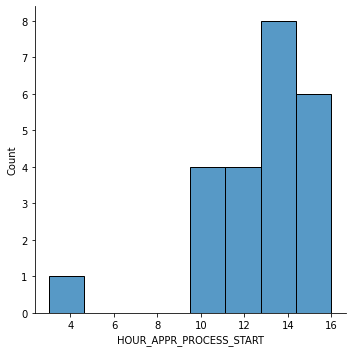

In [147]:
plt.figure(figsize=(9, 8))
sns.displot(df.HOUR_APPR_PROCESS_START)

plt.savefig('HOUR_APPR_PROCESS_START.png')

In [ ]:
df.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,HOUR_APPR_PROCESS_START,SELLERPLACE_AREA,CNT_PAYMENT,NFLAG_INSURED_ON_APPROVAL
count,2.300000e+01,23.000000,23.000000,23.000000,23.000000,23.000000,23.0,23.000000
mean,1.606968e+06,275738.652174,12331.643478,136147.773913,12.913043,498.086957,12.0,0.173913
std,4.951828e+05,97350.959047,10026.995413,120085.331643,2.937424,1474.766111,0.0,0.387553
min,1.065416e+06,114409.000000,1469.835000,15934.500000,3.000000,1.000000,12.0,0.000000
25%,1.206368e+06,203198.000000,4910.737500,50337.000000,12.000000,24.000000,12.0,0.000000
50%,1.375443e+06,295979.000000,10324.665000,112500.000000,14.000000,50.000000,12.0,0.000000
75%,1.986758e+06,346366.000000,15736.320000,170550.000000,14.500000,132.500000,12.0,0.000000
max,2.697394e+06,455008.000000,45418.500000,562500.000000,16.000000,7000.000000,12.0,1.000000


In [ ]:
df.dtypes

SK_ID_PREV                      int64
SK_ID_CURR                      int64
NAME_CONTRACT_TYPE             object
AMT_ANNUITY                   float64
AMT_APPLICATION               float64
WEEKDAY_APPR_PROCESS_START     object
HOUR_APPR_PROCESS_START         int64
NAME_CONTRACT_STATUS           object
SELLERPLACE_AREA                int64
NAME_SELLER_INDUSTRY           object
CNT_PAYMENT                   float64
NAME_YIELD_GROUP               object
PRODUCT_COMBINATION            object
NFLAG_INSURED_ON_APPROVAL     float64
dtype: object

In [143]:
df.to_csv('previous_application.csv')